In [8]:
## Load in packages.. to be updated as you continue

import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon
%matplotlib inline
import matplotlib.pyplot as plt
from geopy.geocoders import GoogleV3
from pandas import Series
import requests, json
from pandas.io.json import json_normalize
from datetime import datetime, timedelta
import earthpy as et
import seaborn as sns
import pylab as pl

# Install a pip package in the current Jupyter kernel
import sys
#!{sys.executable} -m pip install ruptures

import ruptures as rpt

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [9]:
# Import stream stage (in meters) information.. sh=stage height
##sh02290768 <- importDVs("02290768", code = "00072", stat = "00003", sdate = "2000-01-01", edate = "2020-06-01")
# Examine the attributes of the data frame to show that the parameter
# code and statistics code are saved with the dataframe
##attributes(sh02290768)[c("code","stat")]

# Calculate the longest term anomolies possible using compAnom (which =4))
##q02290768 <- importDVs("02290768", sdate = "2000-01-01", edate = "2020-06-01")
##anoms02290768 <- compAnom(q02290768, which = 4)

# Plot the anomolies from previous step
##q02290768 <- importDVs("02290768", sdate= "2000-01-01", edate= "2020-06-01")
##anoms02286400 <- compAnom(q02290768, which=4)
##plotAnoms(anoms02290768)

#Site Info (what is the difference between these two?)
##staInfo <- siteInfo("02290768")
##staInfo

##staInfo <- siteInfo(c("02290768")) # c means concantonate which makes a list 

###########################################################################################

#Read in CSV
csvlocation = '02290768_CSV.csv'
miamigage = pd.read_csv(csvlocation, engine='python') 
#Now using Ruptures package
#Changepoint Detection utilizing Pelt Search Method




FileNotFoundError: [Errno 2] No such file or directory: '02290768_CSV.csv'

In [19]:
#import os
#os.listdir()
###miamigage.stage_ft
#Establish start and end time
###start_time= pd.to_datetime('2000-01-01')
###end_time= pd.to_datetime('2020-06-01')
#Format datetime column
###miamigage['datetime']=miamigage['datetime'].astype(str)
#Convert date column into a date object
###miamigage['datetime']=pd.to_datetime(miamigage['datetime'])
#Select specific range
###miamigage=miamigage[(miamigage['datetime']<=end_time)]
###miamigage=miamigage[(start_time <=miamigage['datetime'])]
###plt.xlabel('Date')
###plt.ylabel('Stream Stage (feet)')
###plt.title('Change Point Detection: Pelt Search Method')
#Convert time series values to a numpy 1D array
###points=np.array(miamigage['stage_ft']
###miamigage.stage_ft.plot()
#'02290768_CSV.csv'

#headers = ['placeholder','Date','Stream Stage (feet)']

#Call in CSV
##csvlocation = '02290768_CSV.csv'
csvlocation = r'E:\NLD_DSWE\data\miami_stream_gage\02290768_CSV'
#Read in csv as miamigage
miamigage = pd.read_csv(csvlocation)

#pd.to_datetime(df['Date'] + ' ' + df['Stream Stage (feet)'])
#df.apply(lambda r : pd.datetime.combine(r['Date'],r['Time']),)

#plot miamigage
miamigage.plot(x='Date', y='Discharge_CFS')
df = pd.DataFrame(index=pd.date_range("2000-01-01", "2020-06-01"))
#algo = rpt.Pelt(model=model).fit(points)
#rpt.display(points, result, figsize=(10, 6))


#plt.xlim((pd.to_datetime("2000-01-01"),pd.to_datetime("2020-06-01")))
#df = pd.concat([miamigage.drop(['Date', 'Stream Stage (feet)'], axis=1),miamigage],axis=1)
#df = pd.concat([df.drop(['column_1', 'column_1'],axis=1), dummies],axis=1)
###plt.axvline(df.(2008, 5, 30), color='r')
##ax = miamigage.plot()
##ax.axvline(pd.to_datetime('2008-05-30'), color='r', linestyle='--', lw=2)
#plt.vlines(x=['2008-05-30'], ymin=0, ymax=1050, colors='red', ls='--', lw=2, label='Construction')


#Comment in this line to see the vertical construction line... 
#plt.vlines(x=datetime(2008, 5, 30), ymin=0, ymax=1050, colors='red', ls='--', lw=2, label='Construction')
#abline(v = c(30, 70), col="red") #coordinate will be the dates
#plt.axvline(pd.Timestamp('2008-05-30'),color='r')
#Establish labels on x and y axis using plt.?label
plt.xlabel('Date')
plt.ylabel('Discharge (CFS)') #check on usgs for the discharge units of this specific gage.. theyre all different. 

# Rotate the x labels so they are readable
pl.xticks(rotation = 20)
# Name the plot
plt.title('Frequency of Flow Events: USGS SG 02290768', color='black')
#Can tighten up the plot, typically leads to overlapping
#plt.tight_layout()
plt.show()



FileNotFoundError: [Errno 2] File E:\NLD_DSWE\data\miami_stream_gage\02290768_CSV does not exist: 'E:\\NLD_DSWE\\data\\miami_stream_gage\\02290768_CSV'

In [10]:
# Change Point Algorithm for Downloaded Stream Stage Data
##https://lindeloev.github.io/mcp/articles/packages.html

In [11]:
#library(mcp)
#set.seed(42)  
#df = data.frame(
#    x = miamigage.datetime #1:100, #change these axes, going to be dates instead of 1 to 100
#  y = miamigage.stage_ft #change these axes, compare stream stage  time 
#)
##Plot above 
#plot(df)
#abline(v = c(30, 70), col="red") #coordinate will be the dates
#https://techrando.com/2019/08/14/a-brief-introduction-to-change-point-detection-using-python/ 



In [12]:

model="rbf"
points=np.array(miamigage['Discharge_CFS'])

plt.xlabel('Date')
plt.ylabel('Discharge_CFS')
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
#plt.show()

#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()
    
#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()
    
#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()

#Format the 'Date' column 
####miamigage['datetime']=miamigage['datetime'].astype(str).str[:-3]
#Convert the Date column into a date object
####miamigage['datetime']=pd.to_datetime(miamigage['datetime'], format='%Y-%m-%d')

#Subset to only include data going back to 2014
#price_df=price_df[(price_df['Date']>='2014-01-01')]    # don't need yet

#Convert the time series values to a numpy 1D array
####points=np.array(miamigage['stage_ft'])

# Levee build date is May 30 2008 


#x = 3000 #np.linspace(-4000,4000,10000)
#y = 3000
#axvline(x=3050)
#plt.xlabel('x', color='#1C2833')
#plt.ylabel('y', color='#1C2833')
#plt.plot(x, y, '-r', label='Levee Construction Date')
#plt.title('Levee Construction Date')

#plt.legend(loc='upper left')
#plt.grid()
#plt.show()

#library(mcp)
#set.seed(42)  
#df = data.frame(
#    x = miamigage.datetime #1:100, #change these axes, going to be dates instead of 1 to 100
#    y = miamigage.stage_ft #change these axes, compare stream stage  time 
#)
#Plot above 
#plot(df)


NameError: name 'miamigage' is not defined

In [13]:
##Latitude/Longitude Box

In [ ]:
#{
#    "gridType": "WRS1",
#    "responseShape": "polygon",
#    "path": 1,
#    "row": 1
#}
#{
#    "errorCode": null,
#    "error": "",
#    "data": {
#        "shape": "polygon",
#        "coordinates": [
#            {
#                    "latitude": 81.022416063373,
#                    "longitude": 6.9559981722311
#            },
#            {
#                    "latitude": 79.487051168895,
#                    "longitude": 10.556549319804
#            },
#            {
#                    "latitude": 78.913203534252,
#                    "longitude": 3.376814651321
#            },
#            {
#                    "latitude": 80.357862865289,
#                    "longitude": -1.0798837603027
#            }
#        ]
#    },
#    "api_version": "1.4.0",
#    "access_level": "user",
#    "catalog_id": "default",
#    "executionTime": 0.0075030326843262
#}

In [ ]:
## Read in Levee shapefile as a geopandas dataframe (variable name "levee")

In [7]:
# gpd.read_file()

# OR you can read in the zipped file... might be better because it will take in all files in folder rather than just .shp

#miami_levee = r'C:\Users\rgkiey\miami_levee\Centerline\layers'
miami_levee = r'E:\NLD_DSWE\data\miami_levee\Centerline\layers'
levee = gpd.read_file(miami_levee) #read in shapefile
print(levee)

NameError: name 'gpd' is not defined

In [8]:
# For more help with getting geopandas.read_file() to do what you want...
# import fiona; help(fiona.open)

In [9]:
## Read in shapefile of USGS gage locations (variable name "gages", with shapefile attached to this email) 

gages = gpd.read_file(r'C:\Users\rgkiey\gagesII_9322_point_shapefile') # read in shapefile
print (gages) #print will return the attribute table of shapefile

         STAID                                            STANAME    CLASS  \
0     01011000                Allagash River near Allagash, Maine  Non-ref   
1     01013500                   Fish River near Fort Kent, Maine      Ref   
2     01015800               Aroostook River near Masardis, Maine  Non-ref   
3     01016500                     MACHIAS RIVER NEAR ASHLAND, ME  Non-ref   
4     01017000                 Aroostook River at Washburn, Maine  Non-ref   
...        ...                                                ...      ...   
9317  50141000                         RIO BLANCO NR ADJUNTAS, PR      Ref   
9318  50144000          RIO GRANDE DE ANASCO NR SAN SEBASTIAN, PR  Non-ref   
9319  50145395                   RIO CASEI ABV HACIENDA CASEI, PR      Ref   
9320  50147800              RIO CULEBRINAS AT HWY 404 NR MOCA, PR  Non-ref   
9321  50148890  RIO CULEBRINAS AT MARGARITA DAMSITE NR AGUADA, PR  Non-ref   

      AGGECOREGI  DRAIN_SQKM HUC02   LAT_GAGE   LNG_GAGE STATE 

<AxesSubplot:>

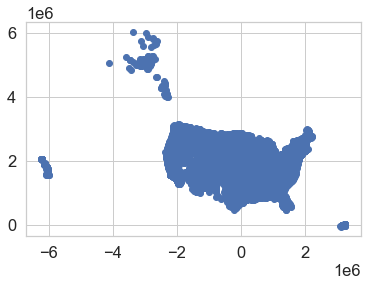

In [10]:
%matplotlib inline
gages.plot()

In [11]:
#  Subset "levee" to only include a certain id within Miami-Dade levee. id is 3401003060

levee_points = gpd.read_file(r'C:\Users\rgkiey\miami_levee\Centerline\layers') #read in levee as gpd
levee_points.id
np.unique(levee_points.id) #'id'= 3401003348
leveesubset = levee_points[levee_points.id == 3401003060]
print(leveesubset)

                             name    systemId    segmentI  vertical slopeLan  \
8  8.5 SMA Perimeter Levee L-357W  3405000090  3404000186       0.0      4:1   

  slopeWat          id  crestWid  \
8      4:1  3401003060      20.0   

                                            floodSou  \
8  Prevent overflow from the Everglades area. Eve...   

                         segmentN  length              systemNa  horizont  \
8  8.5 SMA Perimeter Levee L-357W     6.0  8.5 Square Mile Area       0.0   

  material               bankside     tycuto  \
8  Earthen  Right descending bank  No Cutoff   

                                            coordina  leveeTyp status  \
8  Centimeter Level, used a minimum of 2 GPS rece...  Mainline   None   

                                            geometry  
8  LINESTRING (-80.53748 25.60934, -80.53748 25.6...  


In [12]:
type(levee)
levee.head

<bound method NDFrame.head of                                           name    systemId    segmentI  \
0               8.5 SMA Perimeter Levee L-357W  3405000090  3404000186   
1               8.5 SMA Perimeter Levee L-357W  3405000090  3404000186   
2  8.5 SMA Seepage Canal Internal Levees L-357  3405000090  3404000185   
3  8.5 SMA Seepage Canal Internal Levees L-357  3405000090  3404000185   
4  8.5 SMA Seepage Canal Internal Levees L-357  3405000090  3404000185   
5  8.5 SMA Seepage Canal Internal Levees L-357  3405000090  3404000185   
6  8.5 SMA Seepage Canal Internal Levees L-357  3405000090  3404000185   
7  8.5 SMA Seepage Canal Internal Levees L-357  3405000090  3404000185   
8               8.5 SMA Perimeter Levee L-357W  3405000090  3404000186   
9               8.5 SMA Perimeter Levee L-357W  3405000090  3404000186   

   vertical slopeLan slopeWat          id  crestWid  \
0       0.0      4:1      4:1  3401003063      12.0   
1       NaN     None     None  3401004090    

In [13]:
## Subset dataframe to include only the levee that you want to test (see code above, use pandas indexing)

In [14]:
#SEE ABOVE
#subset_test=subset.loc[subset['SystemID']==<3405000090>] #miami_test will serve as your subset

In [15]:
## Create 4 new columns on "levee" called: "xmin" "xmax" "ymin" "ymax".  Here "x" refers to longitude,
## "y" refers to latitude. We're creating the bounding box of our study area. They should be filed 
## with nan values or -9999 (bc no coordinate is -9999, lets us find it later to convert it to nan). 

In [16]:
subset_test=subset_test.assign(xmin=np.nan)
subset_test=subset_test.assign(xmax=np.nan)
subset_test=subset_test.assign(ymin=np.nan)
subset_test=subset_test.assign(ymax=np.nan)

NameError: name 'subset_test' is not defined

In [17]:
## For your single-row geopandas data frame, assign bounding box values manually
i=0
subset_test.at[i,'xmin']=<25.454>
subset_test.at[i,'xmax']=<25.760>
subset_test.at[i,'ymin']=<-80.671>
subset_test.at[i,'ymax']=<-80.477>

SyntaxError: invalid syntax (<ipython-input-17-4becf0cc5167>, line 3)

In [18]:
## Use Earth Explorer API to identify download links for all DSWE tiles within bounding box coordinates 
## (can be pulled directly from "levee" dataframe). Save list of download links as a file named using levee ID. 

In [1]:
# This is the old version that I got an API key to appear for. 
import requests, json
import numpy as np
import pandas as pd
import sys
import time
import argparse
import os

from pandas.io.json import json_normalize
from datetime import datetime, timedelta
from zipfile import ZipFile

In [2]:
m2mhost = 'https://m2m.cr.usgs.gov/api/api/json/stable/'

In [3]:
data = { 'username' : 'ryankiey0804', 'password' : 'Kiey2020Soccer4429', 'authType' : 'EROS', 'catalogID' : 'EE' }
json_data = {'jsonRequest' : json.dumps(data)}
url = m2mhost + 'login'

response = requests.post(url, data=json.dumps(data));
json_response = response.json()

if json_response['data'] is not None:
    api_key = json_response['data']
    print('API Key Received: {}'.format(api_key))
elif json_response['error'] is not None:
    print(json_response['error'])
else:
    print('Something went wrong')

API Key Received: eyJjaWQiOjI0NDg3MDg1LCJzIjoiMTYwODIzNzM2NCIsInIiOjYwMCwicCI6W119


In [ ]:
# Earth Explorer API to ID download links for all DSWE tiles within bounding box coordinates

In [5]:
# Search for Datasets by name
# Using a filter on dataset name to only get datasets with 'DSWE' in the name
dataset_filter = { 'apiKey' : api_key , 'datasetName': 'DSWE' } 
dataset_json = {'jsonRequest' : json.dumps(dataset_filter)}
dataset_url = m2mhost + 'datasets/'
dataset_response = requests.post(dataset_url, data=dataset_json)

dataset_rjson = dataset_response.json()
data
#info = json.loads(js.decode("utf-8")) 

if dataset_rjson['data'] is not None:
    for datasets in dataset_rjson['data']:
        print("Dataset {}: {}".format(datasets['datasetName'],datasets['datasetFullName']))
else:
    print('No datasets return or an error occurred')


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [21]:
# Searching an Earth Explorer dataset..

In [22]:
#Based on the last search, find the Dataset you want
#U.S. Landsat 4-8 Dynamic Surface Water Extent (DSWE) Landsat Science Product Tiles (Albers projection) is SP_TILE_DSWE

dataset = 'SP_TILE_DSWE'

print("Searching for {}".format(dataset))

# Set up your filters
# Temporal filter is set to March 2019
# Spatial filter is set to the extent of flooded areas around Omaha, NE 

temporal_filter = {'startDate':'2000-01-01','endDate':'2020-06-01'}
spatial_filter =  {'filterType':'mbr','lowerLeft': {'latitude' : '25.454' , 'longitude':'-80.671'}, 
                   'upperRight': {'latitude':'25.760','longitude':'-80.477'}}

                                 
                               
data = {'apiKey' : api_key, 'datasetName' : dataset, 'temporalFilter': temporal_filter, 'spatialFilter': spatial_filter,
        'maxResults' : 1630} # should maxResults be the same as the # of DSWE tiles from next line? original was 300

json_data = {'jsonRequest' : json.dumps(data)}
url = m2mhost + 'search/'
response = requests.post(url, data=json_data)

# Format the reponse as json
json_response = response.json()


if json_response['data'] is not None:
    if json_response['data']['results'] is not None:
        for scenes in json_response['data']['results']:
            print("Entity ID: {}".format(scenes['entityId']))
            scene_id = scenes['entityId']
            

            # Now that we have the scene, let's get the downloads available for this record
            # The DownloadOptions may give you more than one option for a scene / dataset
            # This just assumes the 'Standard' product is required
            data = { 'datasetName' : dataset, 'apiKey' : api_key, 'entityIds' : scene_id , 'products' : 'DSWE', 
                    'downloadCode' : 'DSWE'}
            json_data = {'jsonRequest' : json.dumps(data)}
            url = m2mhost + 'download/'

            response = requests.post(url, data=json_data)
            json_response = response.json()

            if json_response['data'] is not None:
                for info in json_response['data']:
                    # print(info)
                    sceneid = info['entityId']
                    url = info['url']
                    # downloads[sceneid] = url
                    print("{} {}".format(sceneid, url))
            else:
                print("ERROR Received: {}".format(json_response['error']))
    else:
        print('No scenes returned or an error occurred')
else:
    print('An error occurred')
    if json_response['error'] is not None:
        print(json_response['error'])


Searching for SP_TILE_DSWE


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
## Create an empty pandas dataframe with 3 column and rows = the number of DSWE tiles (variable name "innundated_area"

In [ ]:
# Number of DSWE tiles = 1630
# df will be 3 x 1630
df = pd.DataFrame({'inundated_area':[]})
pd.DataFrame(index=np.arange(1630), columns=np.arange(3))

In [ ]:
## Create an empty raster with dimensions = the dimension of single bounding box clipped DSWE tile (variable name "levee_DSWE".

In [23]:
#help("raster-package")

levee_DSWE <- raster()
levee_DSWE
levee_DSWE <- (ncol=3, nrow=1630, xmn=25.454, xmx=25.76, ymn=-80.671, ymx=-80.477)
projection(levee_DSWE) <- "+proj=utm +zone=48 +datum=NAD83" 


SyntaxError: invalid syntax (<ipython-input-23-bb413cb2774b>, line 5)

In [ ]:
## Initiate a loop that links through all download links (= the number of DSWE tiles). Run the following commands:
##   i. download ith DSWE tile
##   ii. subset it to extent of levee bounding box coordinates (can be pulled directly from "levee" dataframe)
##   iii. innundated_area[i,0]=date of DSWE capture
##   iv. innundated_area[i,1]=total number of innundated pixels in DSWE tiles
##   v. innundated_area[i,2]=total number of pixels in DSWE tile
##   vi. append ith DSWE tile to "levee_DSWE" raster
##   (end loop)

In [ ]:
## Save innundated_area as .txt file (file name <leveeID> + "innundate_area.txt"

In [ ]:
## Save stacked DSWE raster as .tif (file name <leveeID> + "DSWE")

In [ ]:
## Download USGS stream stage data nearest to levee from 07-01-1999 through 06-31-2020. Save it as <leveeID> + "stage.csv"

In [ ]:
## Merge <leveeID> + "stage.csv" and <leveeID> + "innundated_area.csv" by date